# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цели исследования:
1. Проверить наличие зависимости влияния на стоимость объекта следующих факторов
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
2. Найти особенности распределения различных параметров объекта недвижимости 
3. Изучить длительность публикации объявлений
4. Изучить зависимость стоимости квадратного метра от расстояния до центра города

### 1. Открываем файл с данными и изучаем общую информацию. 

#### 1.1 Импортируем необходимые библиотеки, загружаем данные из файла в датафрейм

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 30)

In [1]:
data = pd.read_csv('datasets/real_estate_data.csv', sep = '\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### 1.2 Получаем информацию об исходных данных

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### 1.3 Визуализируем исходные данные с помощью гистограмм

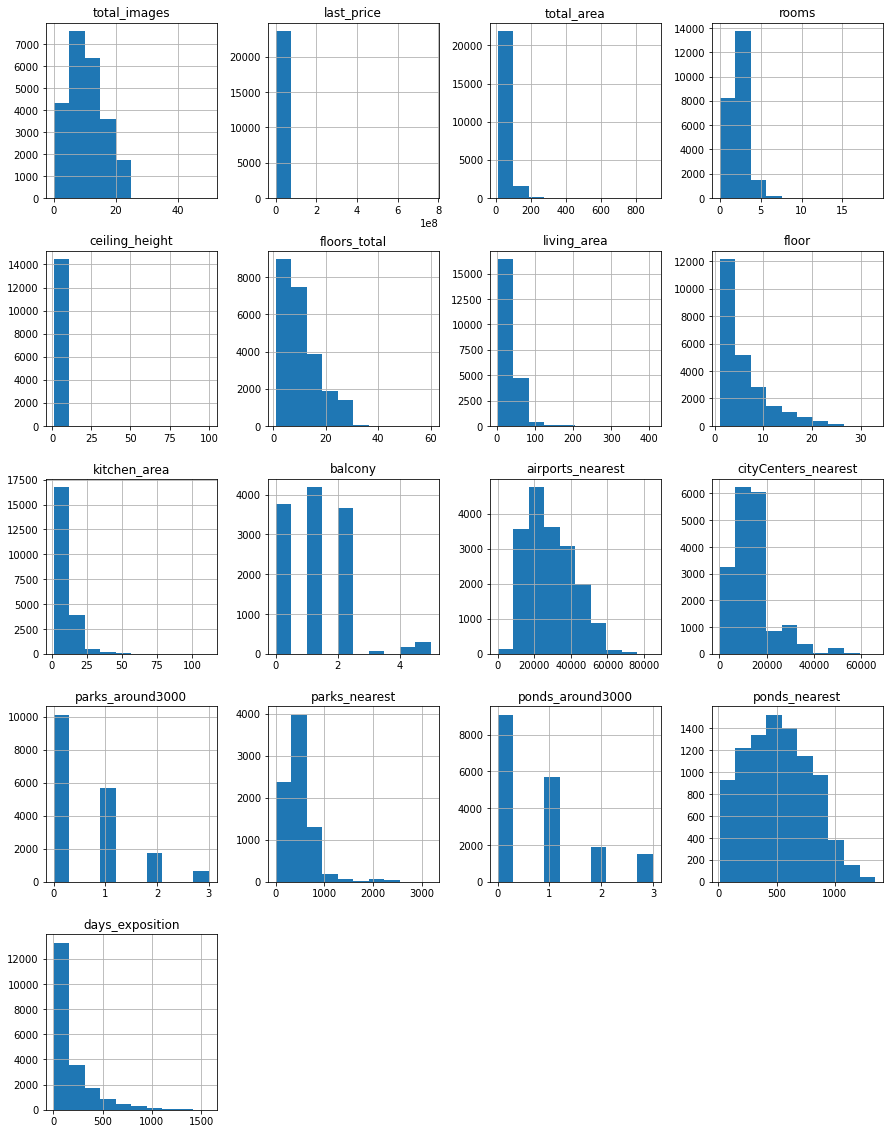

In [3]:
data.hist(figsize=(15, 20))
plt.show()

#### 1.4 Методом `describe()` получим статистику

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод по шагу 1**

Данные получены, нуждаются в преобработке, в данных есть пропуски, судя по гистограммам и стат данным, в данных есть выбросы, вроде высоты потолков в 100 метров 

### 2. Предобработка данных

#### 2.0.1 Переименование столбцов

Сразу приведем столбец `cityCenters_nearest` к змеиному стилю

In [5]:
data = data.rename(
    columns = {'cityCenters_nearest': 'city_centers_nearest'}
    )

#### 2.1.1 Находим и изучаем пропущенные значения в столбцах датафрейма. 

Можно посмотреть как на команду `info()` выше, так и просуммировать все пропущенные значения. Всего строк в датафрейме 23699. Выведем результат в процентах, чтобы оценить полноту данных

In [6]:
pd.concat([data.isna().sum(), data.isna().sum()/23699*100], axis = 1).rename(columns = {0:'nan_sum',1:'nan_percent'})

,nan_sum,nan_percent
total_images,0,0.000000
last_price,0,0.000000
total_area,0,0.000000
first_day_exposition,0,0.000000
rooms,0,0.000000
ceiling_height,9195,38.799105
floors_total,86,0.362885
living_area,1903,8.029875
floor,0,0.000000
is_apartment,20924,88.290645


In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропуски обнаружены в столбцах:
- `ceiling_height` - высота потолков (м) - 9195 пропусков, что составляет 38.8% от общего числа строк. Высота потолков зависит от конкретного ЖК, в котором расположена квартира, а этих данных у нас нет. Можно предположить, что квартиры с высокими потолками расположены ближе к центру. Стоит проверить эту гипотезу и заполнить пропуски медианными значениями, если она подтвердится.
- `floors_total` - всего этажей в доме - 86 пропусков, это менее 0,4% данных. Можем попробовать заполнить пропуски по алгоритму выше, если количество этажей в здани. Если не получится и нам понадобятся чистые данные, то можем просто удалить эти строки, такой низкий процент не повлияет на результат
- `living_area` - жилая площадь в квадратных метрах - 1903 пропусков, чуть более 8% от всех данных. Жилая площадь должна коррелировать с общей площадью квартиры. Проверим гипотезу и заполним медианным значением, если она подтвердится.
- `is_apartment` - апартаменты (булев тип)  - 20924 пропусков. Более 88%. Пропусков очень много. Вероятно, что данные плохо выгрузились и пропуски находятся на месте квартир, а не опартаментов. Проверим и заполним, если гипотеза подтвердится
- `kitchen_area` - площадь кухни в квадратных метрах  - 2278 пропусков (9,61%). Поступим так же, как с жилой площадью.
- `balcony` - число балконов  пропусков  - 11519 пропусков. Можно заполнить нулями, но сначала посмотрим данные.
- `locality_name` - название населённого пункта  - 49 пропусков. Категориальные значения. Определить по удалению от центра вряд ли получится. Заполним пропуски значением `Неизвестно`
- `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)  - 5542 пропусков. Можем попробовать заполнить пропуски медианным значением в зависимости от населенного пункта. Кроме самого СПБ, т.к. это крупный город.
- `city_centers_nearest` - расстояние до центра города (м)  - 5519 пропусков, можем точно так же заполнить пропуски медианным значением для всех городов кроме СПБ, если разброс данных небольшой
- `parks_around3000` - число парков в радиусе 3 км  - 5518 пропусков. Посмотрим на данные и попробуем сделать как в пункте выше.
- `parks_nearest` - расстояние до ближайшего парка (м)  - 15620 пропусков. Аналогично.
- `ponds_around3000` - число водоёмов в радиусе 3 км  - 5518 пропусков. Аналогично.
- `ponds_nearest` - расстояние до ближайшего водоёма (м)  - 14589 пропусков. Аналогично
- `days_exposition` - сколько дней было размещено объявление (от публикации до снятия)  - 3181 пропусков. С пропусками ничего сделать не сможем

`airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000` имеют близкие значения по количеству пропусков. Вероятно, что проблема в выгрузке геоданных, нужно посмотреть на срез датафрейма с пропусками и попробовать определить причину.

#### 2.1.2 Работа в дубликатами

Для того, чтобы удалить пропуски в данных, связанных с геопозицией нам для начала понадобится удалить дубликаты. Начнем с полных дубликатов наименований поселений

In [8]:
data.duplicated().sum()

0

Полных дубликатов нет. Посмотрим на названия населенных пунктов и удалим неявные дубликаты оттуда. Перед этим все NaN заменим на `Неизвестно`.

In [9]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [10]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

365 уникальных наименований! Сразу бросается в глаза различия в написаниях `поселок` и `посёлок`, `городской посёлок` и `поселок городского типа`. На мой взгляд, лучшим решением будет удалить из названий все ненужное, приведя их к одному виду, и поменять `ё` на `е`.

In [11]:
def excess_name_delete(name):
    name = name.replace('ё','е')
    name = name.replace('поселок городского типа','поселок')
    name = name.replace('городской ','')
    name = name.replace('коттеджный ','')
    name = name.replace('при железнодорожной ','')
    return name

In [12]:
data['locality_name'] = data['locality_name'].apply(excess_name_delete)

In [13]:
print(len(data['locality_name'].unique()))
data['locality_name'].sort_values().unique()

320


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестно',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
   

Из 365 наименований получили 320. Вернемся к `Неизвестно`

In [14]:
data.query('locality_name == "Санкт-Петербург"').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,15721.000000,1.572100e+04,15721.000000,15721.000000,10104.000000,15651.000000,14581.000000,15721.000000,14342.000000,8009.000000,15636.000000,15660.000000,15660.000000,7284.000000,15660.000000,7983.000000,13638.000000
mean,10.180205,8.062507e+06,64.751488,2.171618,2.803709,11.395885,36.959148,6.242033,11.155806,1.141965,28046.186237,11601.291571,0.627586,498.597886,0.770434,520.213955,182.792198
std,5.749004,1.301313e+07,40.417095,1.148098,1.296912,6.372330,24.701374,4.900486,6.543392,1.093276,11557.063820,4842.035279,0.787867,345.181284,0.924568,280.260745,224.719204
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,4.200000e+06,42.000000,1.000000,2.550000,5.000000,19.900000,3.000000,7.200000,0.000000,18584.250000,8327.000000,0.000000,295.000000,0.000000,293.000000,42.000000
50%,10.000000,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.300000,5.000000,9.900000,1.000000,26757.500000,12244.500000,0.000000,460.000000,1.000000,503.000000,95.000000
75%,14.000000,8.160000e+06,74.600000,3.000000,2.870000,16.000000,44.000000,8.000000,12.500000,2.000000,36614.000000,14943.000000,1.000000,619.000000,1.000000,738.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,52.000000,409.700000,33.000000,112.000000,5.000000,54784.000000,29493.000000,3.000000,3190.000000,3.000000,1337.000000,1572.000000


Нас интересует столбец `city_centers_nearest`, максимальное значение у него 29493м. Явно будет ошибкой признать все неизвестные наименования с расстоянием менее 29км. Питер не такой большой город. Чтобы исключить выбросы, мы возьмем расстояние 3го квартиля, то есть 14943м. И сразу проверим результат. Ранее у нас тут было 49 NaN

In [15]:
data.loc[data['city_centers_nearest'] <= 14943, 'locality_name'] = 'Санкт-Петербург'
data.query('locality_name == "Неизвестно"')['locality_name'].count()

21

**Результат: удалены неявные дубликаты, пропуски в названиях заменены на "Неизвестно"**

#### 2.1.3 Проверяем гипотезы выше и пробуем заполнить данные

Порядок заполнения:
- 1 группа: `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`,`ponds_nearest`, `airports_nearest`. По предположению выше, данные будем зполнять исходя из населенного пункта (все, кроме СПБ, т.к. это большой город)
- 2 группа: `ceiling_height` - по гипотезе выше, зависит от расстояния от центра.
- 3 группа: `living_area`, `kitchen_area`, по предположению, зависит от общей площади квартиры
- 4 группа: `balcony`, `is_apartment` - смотрим на данные и решаем что делать

#### 2.1.3.1 Заполняем пропуски в первой группе

Для начала посмотрим, в скольких строках столбцов `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000` значение NaN совпадает

In [16]:
data.query(
    'airports_nearest.isna() and city_centers_nearest.isna() and parks_around3000.isna() and ponds_around3000.isna()').shape

(5518, 22)

Бинго, все эти строки совпадают. Значит, проблема в алгоритме, который работает с геоданными и считает расстояния, передадим проблему разработчикам

Заполняем `city_centers_nearest`

По нашей теории, расстояние от центра должно быть привязано к населенному пункту и мы можем заполнить значения медианами все значения кроме `Неизвестно`. Сначала посмотрим сколько вообще населенных пунктов имеют хоть одно заполненное значение расстояния от центра. Взглянем также на размах данных

In [17]:
(
    data.query('not city_centers_nearest.isna()')
    .pivot_table(index = 'locality_name', values = 'city_centers_nearest', aggfunc = ['min','max','count'])
    .sort_values(('count','city_centers_nearest'),ascending = False)
)

,min,max,count
,city_centers_nearest,city_centers_nearest,city_centers_nearest
locality_name,,,
Санкт-Петербург,181.0,29493.0,15688
поселок Шушары,17012.0,32079.0,436
Пушкин,24311.0,35610.0,368
Колпино,29436.0,37477.0,337
поселок Парголово,17994.0,24415.0,327
Петергоф,29815.0,49574.0,201
Сестрорецк,31130.0,42971.0,183
Красное Село,27317.0,41792.0,176


In [18]:
for city in data.query('locality_name != "Неизвестно" and not city_centers_nearest.isna()')['locality_name'].unique():
    median_value = data.query('locality_name == @city')['city_centers_nearest'].median()
    data.loc[(data['locality_name'] == city) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = median_value

Многие названия городов вовсе не имеют заполненных значений расстояний от центра. Эти данные явно заполняют не сами пользователи. Передадим и эту ошибку разработчикам чтобы они добавили геоданные к поселениям.
Посмотрим, сколько пропусков удалось заполнить

In [19]:
print(data['city_centers_nearest'].isna().sum())
print(data['city_centers_nearest'].isna().sum() / 5519)

4872
0.8827686175031708


Осталось 4872 пропусков из 5519. Заполнили чуть более 11.7% пропусков. Не густо

In [20]:
len(data.query('city_centers_nearest.isna()')['locality_name'].unique())

293

293 поселения вовсе не имеют ни одного заполненного значения `city_centers_nearest`. Предположительно, это маленькие поселения, которые Делаем вывод, что нет смысла пытаться заполнить колонки `parks_around3000`, `parks_nearest`, `ponds_around3000`,`ponds_nearest`, `airports_nearest`. Т.к. в случае больших городов с заполненными геоданными мы получаем высокую вероятность ошибки (т.к. имеем большой разброс), а в случае с малыми нам неоткуда взять медианы.

**Результат: заполнено 11.7% пропусков в `city_centers_nearest`**

#### 2.1.3.2 Заполняем пропуски во 2-й группе

`ceiling_height`

Проверим как высота потолков коррелирует с удалением от центра

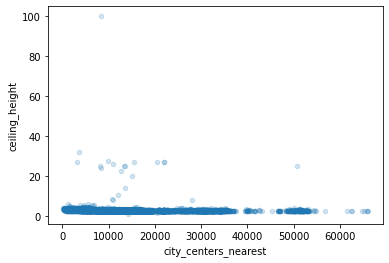

In [21]:
data.plot(x = 'city_centers_nearest', y = 'ceiling_height', kind = 'scatter',alpha = 0.2)
plt.show()

А вот и выбросы в данных, с потолками по 20 и более метров, посмотрим на них.

In [22]:
data.query('ceiling_height >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Предположительно, квартиры с потолками 20 и более метров где-то существуют, но судя по площади и ценнику, это не наш случай. Вероятно, что это опечатки. Приведем к нормальному виду, поделим на 10 все, что более 20 метров. Есть еще 2 интересных значения: 14 метров и 10.3 метра. Что делать с ними - не понятно.

In [23]:
def new_height(height):
    if height >= 20:
        return height / 10
    return height
data['ceiling_height'] = data['ceiling_height'].apply(new_height)

<AxesSubplot: xlabel='city_centers_nearest', ylabel='ceiling_height'>

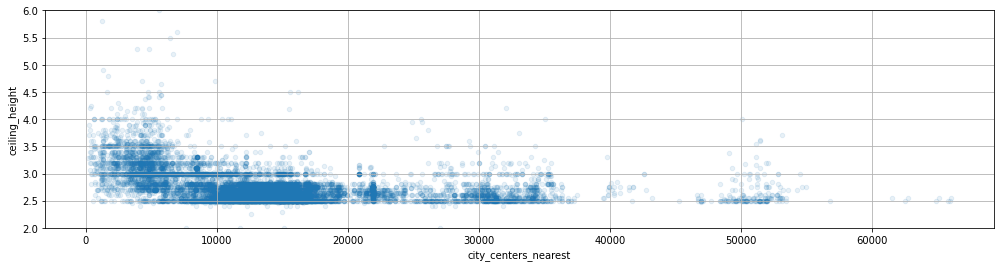

In [24]:
data.plot(
    x = 'city_centers_nearest', y = 'ceiling_height'
    , kind = 'scatter',alpha = 0.1, ylim = (2,6),figsize = (17,4), grid = True)

Видим несколько групп:
- Первая группа. В центре города много квартир с очень высокими потолками. Расстояние от 0м до 6000м. Наверняка, там много элитного жилья. Центр
- Расстояние от 6000м до 16000м. Вторая группа почти без высоких потолков, но большим количеством потолков 3 и более метров. Город.
- Третья группа с потолками до 3м. Расстояние от 16000м до 35000м. Тип жилья очень разнится. Есть как обычные квартиры, так и с высокими потолками. Пригород.
- Остальные, более 35000м. Область

Определим группы и посмотрим на медианы

In [25]:
def category_height(distance):
    if distance <= 6000:
        return 'Центр'
    elif distance <= 16000:
        return 'Город'
    elif distance <= 35000:
        return 'Пригород'
    elif distance > 35000:
        return 'Область'

data['distance_category'] = data['city_centers_nearest'].apply(category_height)
data.pivot_table(index = 'distance_category', values = 'ceiling_height', aggfunc = 'median').sort_values('ceiling_height')

,ceiling_height
distance_category,
Область,2.55
Пригород,2.60
Город,2.65
Центр,3.08


Чем дальше в область - тем ниже потолок. Заполняем пропуски.

In [26]:
for i in data['distance_category'].unique():
    median_value = data.query('distance_category == @i')['ceiling_height'].median()
    data.loc[(data['distance_category'] == i) & (data['ceiling_height'].isna()),'ceiling_height'] = median_value
print(len(data.query('ceiling_height.isna()')))
data.head(10)

2185


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Пригород
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,NaN,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Пригород
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Город
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Город
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Город
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,None
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,NaN,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Пригород
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Город
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,NaN,False,False,8.81,NaN,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,189.0,Пригород
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Город


Там, где расстояние неизвестно в категории удаленности стоит `None`. С этими значениями уже ничего не сделать. Количество оставшихся пропусков в `ceiling_height` равно 2185. Заполнили чуть более 76% пропусков.
Мы обратили внимание на выбросы в большую сторону, но в шаге 1.4 мы видим квартиры с потолками в 1 метр. Поработаем с ними позже

**Результат: поработали с выбросами и заполнили чуть более 76% пропусков в `ceiling_height`**

#### 2.1.3.3 Заполняем пропуски в третьей группе

Проверим как `living_area`и `kitchen_area` коррелируют с `total_area`

0.9395373338721494
0.6091211711198316


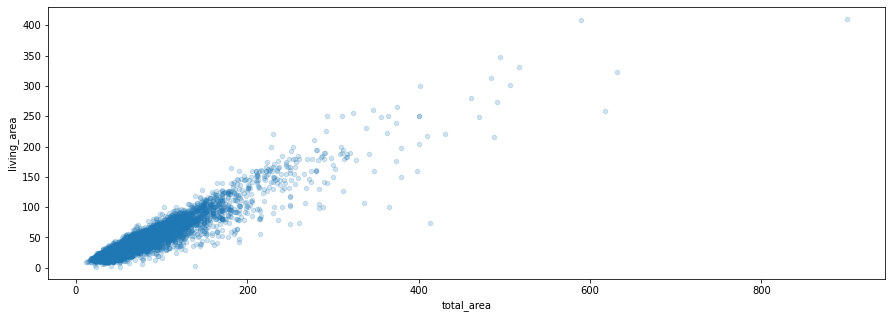

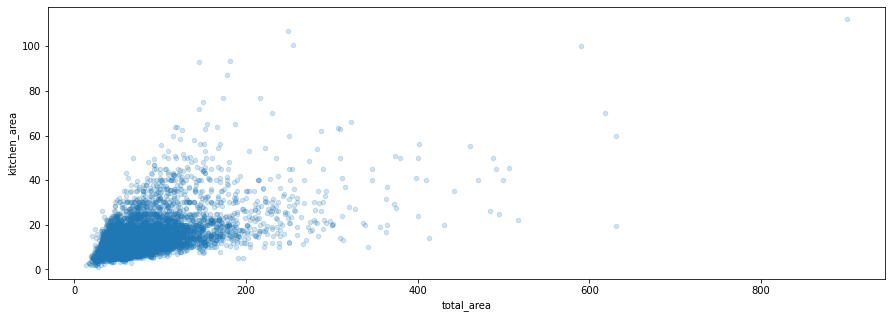

In [27]:
print(data['total_area'].corr(data['living_area']))
print(data['total_area'].corr(data['kitchen_area']))
data.plot(x = 'total_area', y = 'living_area', kind = 'scatter', alpha = 0.2, figsize = (15, 5))
plt.show()
data.plot(x = 'total_area', y = 'kitchen_area', kind = 'scatter', alpha = 0.2, figsize = (15, 5))
plt.show()

Четкая корреляция видна в первом случае, почти линейная. Во втором выражена слабее. Заполним только `living_area`. Предлагаю составить уравнение регрессии и заполнить с помощью него.
В общем случае это уравнение выглядит как `y = y0 + b * x`,
где:
- `x` - независимая переменная, в нашем случае `total_area`
- `y` - зависимая переменная, в нашем случае `living_area`
- `b` - slope, расчитывается как `std_y / std_x * r_xy`, где
    - `std_x` - стандартное отклонение по переменной x, возьмем из пункта 1.4
    - `std_y` - стандартное отклонение по переменной y, возьмем из пункта 1.4
    - `r_xy` - коэффициент корреляции, его мы недавно посчитали
- - `y0` - интерсепт, расчитывается как `y_mean - b * x_mean` (y_mean и x_mean - средние значения, берем из пункта 1.4)

In [28]:
def predict_living_area(tot_area):
    std_x = 35.654083
    std_y = 22.030445
    r_xy = 0.9395373338721494
    y_mean = 34.457852
    x_mean = 60.348651
    b = std_y / std_x * r_xy
    y = y_mean - b * x_mean + b * tot_area
    return y
data['predicted_living_area'] = data['total_area'].apply(predict_living_area)

Проверяем как получилось

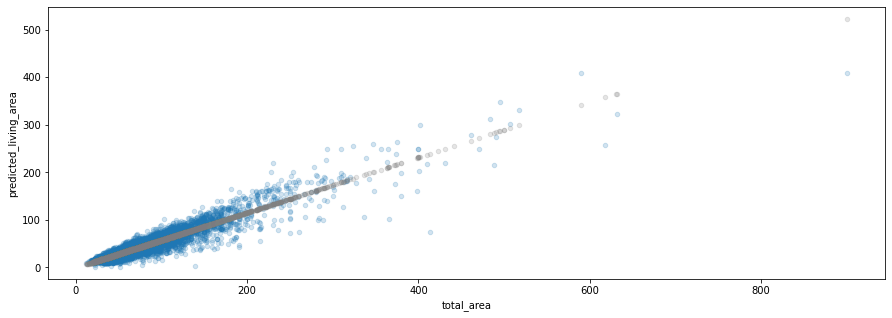

In [29]:
ax = plt.gca()
data.plot(x = 'total_area', y = 'living_area', kind = 'scatter', alpha = 0.2, figsize = (15, 5), ax = ax)
data.plot(x = 'total_area', y = 'predicted_living_area', kind = 'scatter', alpha = 0.2, figsize = (15, 5), ax=ax, color='grey')
plt.show()

Смотрится неплохо, теперь заполним пропуски

In [30]:
data['living_area'] = data['living_area'].fillna(data['predicted_living_area'])
data['living_area'].isna().sum()

0

**Результат: заполнили пропуски в `living_area`**

#### 2.1.3.4 Заполняем пропуски по четвертой группе

Заполняем `balcony`. Предположительно, данные по какому-то значению просто пропали.

In [31]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Нет, все значения на месте. Вероятно, многие пользователи просто не заполняют эту информацию. Оставляем как есть

Заполняем `is_apartment`. Сделаем похожее предположение

In [32]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Та же история, значения никуда не "утекли". 50 штук аппартаментов все же есть в датафрейме. Видимо, пользователи не заполняют эти данные. Оставляем как есть.

удаляем сгенерированные нами столбцы, они нам больше не нужны

In [33]:
data.drop(['distance_category','predicted_living_area'], axis = 1, inplace = True)

**Результат:**
- заполнено 11.7% пропусков в `city_centers_nearest`
- поработали с выбросами и заполнили чуть более 76% пропусков в `ceiling_height`
- заполнили все пропуски в `living_area`

Заполнили пропуски там, где это возможно. Исправили выбросы в высоте потолков. Нашли проблему с геоданными. Предположили почему возникли пропуски в столбцах. Привели данные к красивому виду.

### 2.2 Преобразование данных
Найдем столбцы, где необходимо изменить тип данных

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        21514 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [35]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.600000,1,NaN,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,91.728364,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.400000,5,NaN,False,False,9.10,NaN,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.600000,6,NaN,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.989648,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.430000,26,NaN,False,False,8.81,NaN,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- `last_price` - int, убираем копейки
- `total_area`,`living_area`,`kitchen_area`, - округляем до 1го знака после запятой
- `first_day_exposition` - приводим к `datetime`
-`floors_total`,`balcony`,`airports_nearest`,`city_centers_nearest`,`parks_around3000`,`parks_nearest`,`ponds_around3000`,`ponds_nearest`,`days_exposition` - по идее нужно привести к `int`, но NaN'ы этого сделать не дадут

In [36]:
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].round(1)
data['living_area'] = data['living_area'].round(1)
data['kitchen_area'] = data['kitchen_area'].round(1)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверяем

In [37]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,91.7,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.3,2017-11-02,1,2.60,26.0,10.6,6,NaN,False,False,14.4,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.6,2019-04-18,2,2.65,24.0,41.0,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.2,2018-05-23,1,2.60,27.0,15.4,26,NaN,False,False,8.8,NaN,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Результат: преобразовали данные в нужный вид**

### 2.3 Обработка неявных дубликатов

Провели ее выше

### 2.4 Работа с аномалиями
Еще раз посмотрим на данные и попробуем найти выбросы.

In [38]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,21514.000000,23613.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18827.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348635,2.070636,2.717376,10.673824,34.596375,5.892358,10.569754,1.150082,28793.672193,14443.951957,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654086,1.078405,0.278262,6.597173,22.394897,4.885249,5.905448,1.071300,12630.880622,8597.958915,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9479.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13265.000000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,2.000000,37273.000000,16735.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим минимальное значение стоимости в 12 тысяч рублей, квартиры с 0 и 19 комнатами, высотой потолков в 1 метр, жилой площадью в 2 метра, площадью кухни в 1.3 метра
Значит, нам нужно посмотреть, что мы можем сделать с выбросами в столбцах 
- `last_price`
- `rooms`
- `ceiling_height`
- `living_area`
- `kitchen_area`

#### 2.4.1 Смотрим `last_price`

Посмотрим, сколько квартир имеют стоимость ниже 500 тысяч рублей

In [39]:
data.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000,42.0,2017-07-31,2,NaN,1.0,23.0,1,NaN,False,False,5.8,NaN,поселок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000,40.0,2017-12-11,1,NaN,5.0,22.6,3,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000,43.4,2018-08-31,2,NaN,5.0,30.3,3,NaN,False,False,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000,29.1,2016-05-05,1,2.50,5.0,17.0,5,NaN,False,False,5.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14911,5,430000,54.0,2018-06-26,2,NaN,3.0,30.8,3,NaN,False,False,NaN,NaN,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16032,8,480000,32.0,2019-01-06,1,NaN,2.0,16.0,1,NaN,False,False,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
16219,14,450000,38.5,2018-07-11,2,2.65,2.0,21.8,1,NaN,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000,40.0,2018-07-10,1,NaN,5.0,22.6,1,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000,30.4,2019-04-22,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


С деревнями все понятно, но квартира в Санкт-Петербурге, площадью 109 кв.метров явно имеет заниженную стоимость. Скорее всего, хозяин указывал стоимость в тысячах рублей. Поправим.

In [40]:
data.loc[8793,'last_price'] = 12190000

Аномалии в `last_price` исправлены

#### 2.4.2 Смотрим `rooms`

Для начала взглянем верхние значения

In [41]:
data.query('rooms > 10').sort_values('rooms', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.6,2018-06-09,19,3.08,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28659000,245.4,2016-03-31,14,3.08,4.0,168.3,2,NaN,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
648,3,17500000,183.7,2018-07-01,11,3.40,7.0,138.8,7,NaN,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
9688,8,33000000,194.1,2017-02-07,11,3.43,5.0,129.0,2,NaN,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0


Судя по цене и площади - значения верные. Теперь посмотрим что с нулевыми значениями

In [42]:
print(len(data.query('rooms == 0')))
data.query('rooms == 0').head(10)

197


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.0,2017-03-30,0,2.60,24.0,15.5,2,NaN,True,False,NaN,2.0,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25.0,2017-09-27,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27.1,2018-03-12,0,2.65,17.0,24.8,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34.4,2017-03-28,0,2.60,26.0,24.3,19,NaN,False,True,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25.0,2019-02-20,0,2.60,10.0,13.9,7,NaN,True,False,NaN,NaN,поселок Шушары,NaN,24212.0,NaN,NaN,NaN,NaN,29.0
697,12,2500000,24.1,2017-12-01,0,2.75,25.0,17.5,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000,17.0,2017-06-07,0,2.70,9.0,12.0,1,NaN,True,False,NaN,0.0,поселок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000,26.1,2018-02-20,0,2.60,18.0,14.6,8,NaN,False,True,NaN,1.0,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,45.0
839,14,1900000,35.0,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000,23.0,2016-09-27,0,2.60,27.0,18.0,7,NaN,False,True,NaN,2.0,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,483.0


Интересно, много квартир студий, но, не все. Логично, что многие владельцы студий заполняют значение числом 0

In [43]:
data.query('studio == True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Из 149 владельцев студий 138 считают, что это квартиры с 0 комнат, а 11, что это квартиры с 1 комнатой. Приведем к одному виду. Пусть квартиры студии будут квартирами с 0 комнат. Наверное, следует взглянуть еще и на `kitchen_area`

In [44]:
len(data.query('studio == True and kitchen_area > 0'))

0

Отлично, все квартиры-студии имеют NaN в площади кухни. С уверенностью можно оставлять нули там, где совпадают 2 условия квартира - студия с пропуском 

In [45]:
data.loc[data['studio'] == True, 'rooms'] = 0

Осталось решить, что делать с данными где в типе квартиры не указана студия, но число комнат по-прежнему = 0

In [46]:
data.query('studio != True and rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000,25.0,2017-09-27,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000,34.4,2017-03-28,0,2.60,26.0,24.3,19,NaN,False,True,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000,26.1,2018-02-20,0,2.60,18.0,14.6,8,NaN,False,True,NaN,1.0,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,45.0
839,14,1900000,35.0,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000,23.0,2016-09-27,0,2.60,27.0,18.0,7,NaN,False,True,NaN,2.0,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,483.0
1574,0,2200000,22.0,2017-11-03,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000,24.0,2018-02-01,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000,27.1,2018-02-01,0,2.65,18.0,18.7,9,NaN,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000,24.0,2017-11-10,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000,24.0,2018-02-01,0,2.65,25.0,18.0,4,NaN,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


Замечаем, что все подобные квартиры имеют свободную планировку и почти у всех сравнительно небольшая площадь. Делаем вывод, что эти квартиры - студии, а пользователи просто не проставили нужную галочку при размещении объявления. Объявим их студиями. Хотели поработать с `rooms`, а в итоге поработали с `studio`

In [47]:
data.loc[(data['studio'] == False) & (data['rooms'] == 0), 'studio'] = True

#### 2.4.3 Смотрим `ceiling_height`

Стандартная высота потолка не должна быть ниже 2.5 метров, но многие занимаются отделькой потолков, и при замерке не учитывают отделку полов. поработаем с явно низкими значениями ниже 2 метров

In [48]:
data.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,False,False,5.2,NaN,поселок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,False,False,8.3,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,False,False,10.0,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Всего 3 значения. единственное, что могу тут предположить - это банальную опечатку. Прибавим по 1 метру этим квартирам. А разработчиков попросим поставить предупреждение от подобных опечаток

In [49]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] += 1

#### 2.4.4 Смотрим `living_area`

In [50]:
data.query('living_area < 10').sort_values('living_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21758,0,2330000,23.0,2018-01-01,0,2.60,24.0,2.0,22,NaN,True,False,NaN,NaN,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,66.0
13915,20,6350000,52.0,2018-02-06,2,3.00,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23574,14,64990000,139.0,2015-11-24,3,3.00,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
3242,7,4440000,41.0,2017-07-02,1,2.65,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
17582,11,2680000,22.0,2018-08-11,0,2.65,25.0,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21943,15,6100000,77.6,2019-02-28,4,2.50,9.0,5.4,1,NaN,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
16431,13,3799000,31.0,2018-04-12,1,2.60,5.0,6.0,1,NaN,False,False,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19251,19,4050000,33.0,2018-10-15,1,2.50,22.0,6.5,21,NaN,False,False,18.0,NaN,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
19546,3,1850000,13.0,2019-03-11,1,3.40,5.0,7.0,2,False,False,False,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
17961,3,1400000,13.0,2017-12-03,1,2.60,9.0,7.0,1,NaN,False,False,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0


Может ли жилая площадь быть ниже общей площади в несколько раз? Вряд ли. Но трогать значения не будем, т.к. тут возможны как опечатки, так и случаи в которых хозяева квартир-студий отгородили жилую комнату стеной от кухни.

#### 2.4.5 Смотрим `kitchen_area`

In [51]:
data.query('kitchen_area < 5').sort_values('kitchen_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000,28.5,2019-05-01,1,2.80,14.0,19.5,10,NaN,False,False,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
19642,5,1190000,14.0,2018-07-29,1,2.65,5.0,11.0,1,NaN,False,False,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
16367,2,2720000,25.7,2017-10-30,1,2.65,19.0,22.6,11,NaN,False,False,2.0,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
9138,17,2920000,23.3,2018-12-12,1,3.08,3.0,21.0,1,NaN,False,False,2.0,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
906,15,2600000,27.0,2017-07-10,1,2.75,23.0,18.0,18,NaN,False,False,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
6262,9,3100000,24.0,2018-06-25,2,3.00,5.0,16.0,5,NaN,False,False,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
21419,4,1870000,20.0,2018-03-06,1,2.50,5.0,14.0,1,NaN,False,False,2.0,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
11033,6,5350000,32.0,2016-04-20,1,3.08,14.0,16.0,10,NaN,False,False,2.0,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
17834,5,2940000,34.7,2017-10-09,1,2.60,26.0,15.5,14,NaN,False,False,2.3,1.0,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,318.0
8729,9,2200000,18.4,2018-08-20,1,2.52,3.0,14.0,3,NaN,False,False,2.4,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0


Тоже странные значения, которые непонятно откуда взялись. Опечатки? - судя по общей и жилой площади - вряд ли. Не будем трогать.

**Результат:**
- Аномалии в `last_price`,`ceiling_height` исправлены
- Исправили некоторые значение в колонке `studio`

### 3.Добавляем новые столбцы

#### 3.1 Считаем цену квадратного метра и добавляем в датафрейм

In [52]:
data['price_per_m2'] = (data['last_price'] / data['total_area']).astype('int')

#### 3.2 Определяем день публикации объявления и добавляем в датафрейм

In [53]:
data['weekday'] = data['first_day_exposition'].dt.weekday
def weekday_name(weekday):
    weekday_list = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресение']
    return weekday_list[weekday]
data['weekday'] = data['weekday'].apply(weekday_name)

Проверим как применилась функция и заодно посмотрим в какой день чаще всего публикуют объявления

In [54]:
data['weekday'].value_counts()

Четверг        4295
Вторник        4183
Пятница        4000
Среда          3974
Понедельник    3612
Суббота        1936
Воскресение    1699
Name: weekday, dtype: int64

#### 3.3 Определяем месяц публикации объявления

In [55]:
data['publication_month'] = data['first_day_exposition'].dt.month
def month_name(month):
    month_name_list = [
        'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
        'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
    ]
    return month_name_list[month-1]
data['publication_month'] = data['publication_month'].apply(month_name)

И снова посмотрим когда чаще всего публикуют объявления

In [56]:
data['publication_month'].value_counts()

Февраль     2640
Март        2587
Апрель      2379
Ноябрь      2371
Октябрь     2127
Сентябрь    1981
Июнь        1760
Август      1744
Июль        1695
Декабрь     1641
Январь      1500
Май         1274
Name: publication_month, dtype: int64

#### 3.4 Определяем год публикации объявления

In [57]:
data['publication_year'] = data['first_day_exposition'].dt.year

#### 3.5 Определяем тип этажа квартиры

In [58]:
def floor_type(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floors_total'] == row['floor']:
        return 'Последний'
    return 'Другой'
data['floor_type'] = data.apply(floor_type, axis = 1)

#### 3.6 Определяем расстояние в километрах и округляем до целых значений

In [59]:
data['distance_from_center_km'] = (data['city_centers_nearest'] / 1000).round(0)

Проверяем

In [60]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,publication_month,publication_year,floor_type,distance_from_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,Четверг,Март,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,Вторник,Декабрь,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,Четверг,Август,2015,Другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,91.7,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,Пятница,Июль,2015,Другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,Вторник,Июнь,2018,Другой,8.0
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,Понедельник,Сентябрь,2018,Другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.60,26.0,10.6,6,NaN,False,False,14.4,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,Четверг,Ноябрь,2017,Другой,19.0
7,5,7915000,71.6,2019-04-18,2,2.65,24.0,41.0,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,Четверг,Апрель,2019,Другой,12.0
8,20,2900000,33.2,2018-05-23,1,2.60,27.0,15.4,26,NaN,False,False,8.8,NaN,поселок Мурино,NaN,21888.0,NaN,NaN,NaN,NaN,189.0,87349,Среда,Май,2018,Другой,22.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,Воскресение,Февраль,2017,Другой,15.0


**Результат: добавили в датафрейм необходимые столбцы:**
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

### 4.Проведите исследовательский анализ данных

#### 4.1 Изучаем параметры объектов

In [61]:
data[
    [
    'total_area', 'living_area','kitchen_area','last_price','rooms','ceiling_height','floor','floor_type',
    'floors_total','city_centers_nearest','airports_nearest','parks_nearest','weekday','publication_month'
]
].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest
count,23699.000000,23699.000000,21421.000000,2.369900e+04,23699.000000,21514.000000,23699.000000,23613.000000,18827.000000,18157.000000,8079.000000
mean,60.348635,34.596375,10.569754,6.542063e+06,2.070172,2.717515,5.892358,10.673824,14443.951957,28793.672193,490.804555
std,35.654086,22.394897,5.905448,1.088699e+07,1.079081,0.277810,4.885249,6.597173,8597.958915,12630.880622,342.317995
min,12.000000,2.000000,1.300000,4.300000e+05,0.000000,2.000000,1.000000,1.000000,181.000000,0.000000,1.000000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.600000,2.000000,5.000000,9479.000000,18585.000000,288.000000
50%,52.000000,30.000000,9.100000,4.650000e+06,2.000000,2.650000,4.000000,9.000000,13265.000000,26726.000000,455.000000
75%,69.900000,42.100000,12.000000,6.800000e+06,3.000000,2.750000,8.000000,16.000000,16735.000000,37273.000000,612.000000
max,900.000000,409.700000,112.000000,7.630000e+08,19.000000,14.000000,33.000000,60.000000,65968.000000,84869.000000,3190.000000


**Вывод:**

В данных собрана объемная выборка:

из 23699 квартир, 

с площадью от 12 до 900 квадратных метров, 

ценами от 430 тысяч до 763 млн рублей, 

числом комнат от 0(студии) до 19, 

высотой потолков от 2 до 14 метров (явный выброс, с которым мы решили ничего не делать), 

этажностью от 1 до 33

находящимися как в центре, так и в области

#### 4.1.1 Изучаем общую площадь квартир

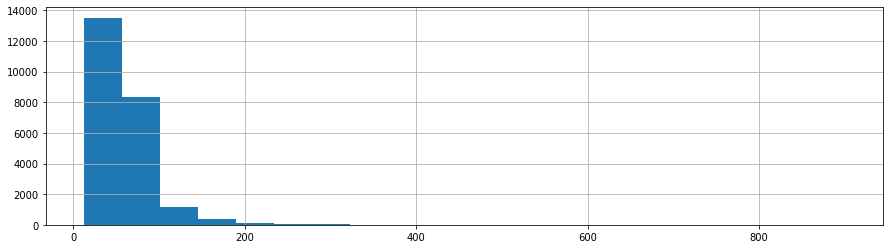

In [62]:
data['total_area'].hist(bins = 20, figsize = (15,4))
plt.show()

Элитного жилья совсем немного. В основном, продаются квартиры площадью до 200 метров. Взглянем на этот срез ближе

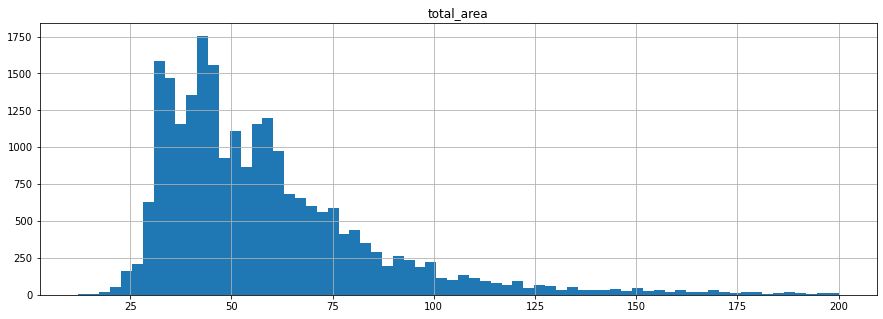

In [63]:
data.query('total_area <= 200').hist('total_area', bins = 70, figsize = (15,5))
plt.show()

**Вывод: Львиная доля квартир представляет собой обычное жилье от 25 до 100 метров. Но есть как совсем небольшие квартиры, так и элитное жилье**

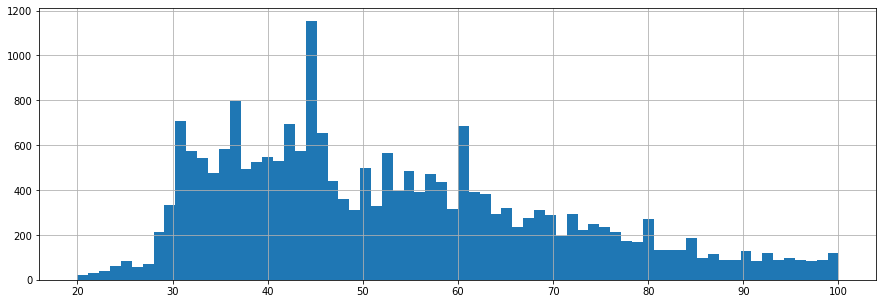

In [64]:
data['total_area'].hist(range = (20, 100), bins = 70, figsize = (15,5))
plt.show()

#### 4.1.2 Изучаем жилую площадь квартир

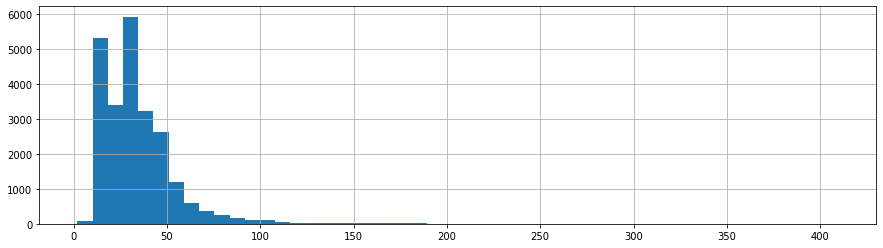

In [65]:
data['living_area'].hist(bins = 50, figsize = (15,4))
plt.show()

Жилая площадь имеет похожую картину, есть 2 моды, отбросим верхний "хвост" и взглянем ближе

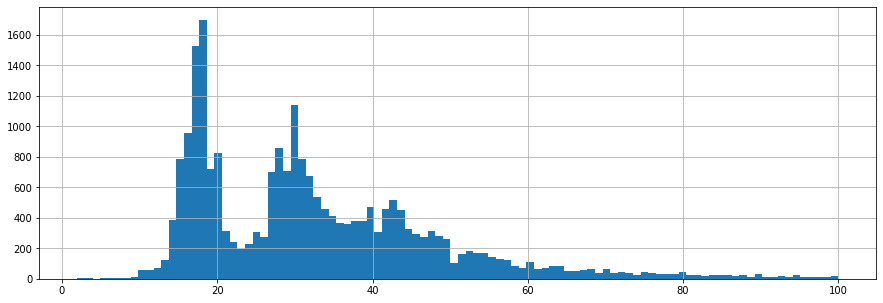

In [66]:
data.query('living_area <= 100')['living_area'].hist(bins = 100, figsize = (15,5))
plt.show()

**Вывод: Видно моды на 18 и 30 метрах. Предположительно там скопились однокомнатные и двухкомнатные квартиры**

#### 4.1.3 Изучаем площади кухонь

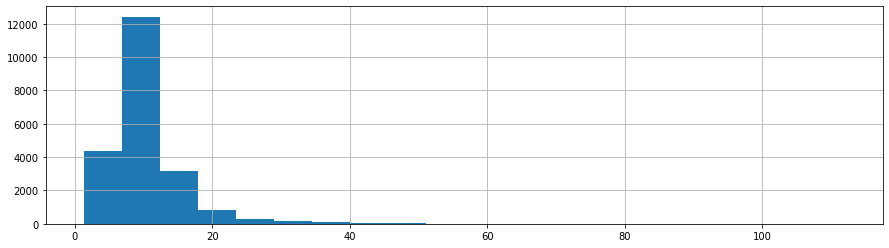

In [67]:
data['kitchen_area'].hist(bins = 20, figsize = (15,4))
plt.show()

Снова смотрим срез, где присутствует основная масса жилья. до 30 метров

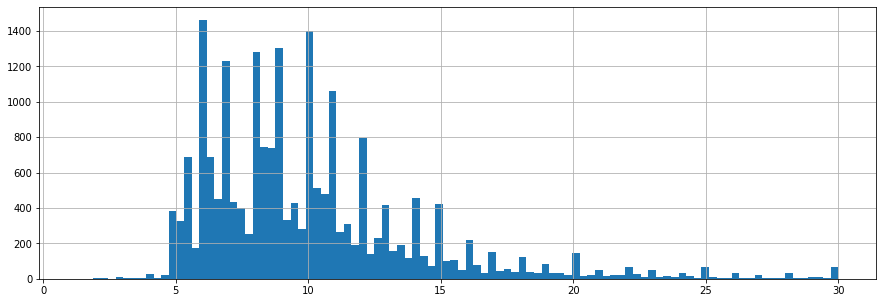

In [68]:
data.query('kitchen_area <= 30')['kitchen_area'].hist(bins = 100, figsize = (15,5))
plt.show()

**Вывод**:
Как мы и замечали, когда заполняли пропуски, площадь кухни не так сильно коррелирует с общей площадью, и мод на графике довольно много.

#### 4.1.4 Изучаем цены квартир

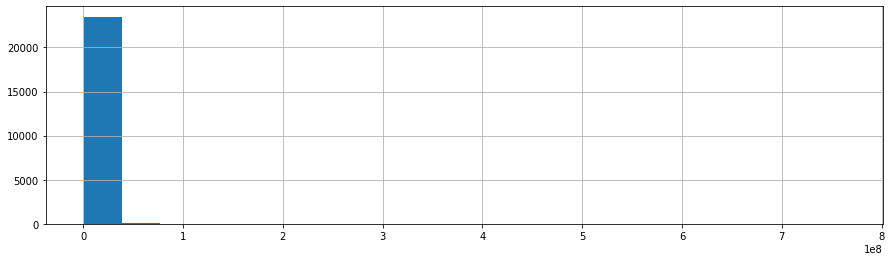

In [69]:
data['last_price'].hist(bins = 20, figsize = (15,4))
plt.show()

Элитное жилье не дает оценить обстановку, посмотрим срез до 20 млн

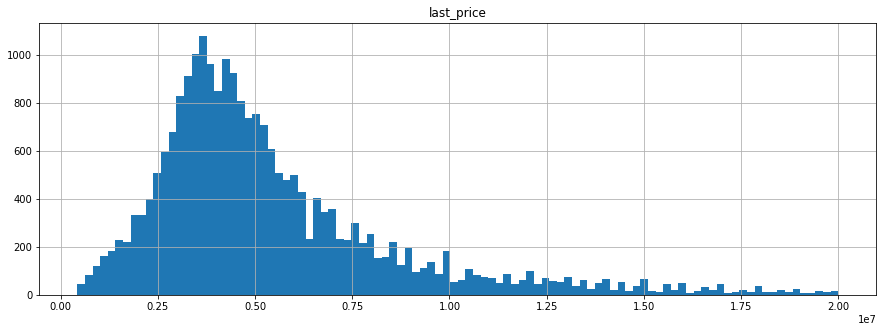

In [70]:
data.query('last_price < 20000000').hist('last_price', bins = 100, figsize = (15,5))
plt.show()

**Вывод:**

Распределение похоже на нормальное, с модой у ~ 3.5 млн рублей. Квартиры есть на любой кошелек

#### 4.1.5 Изучаем комнатность

<AxesSubplot: >

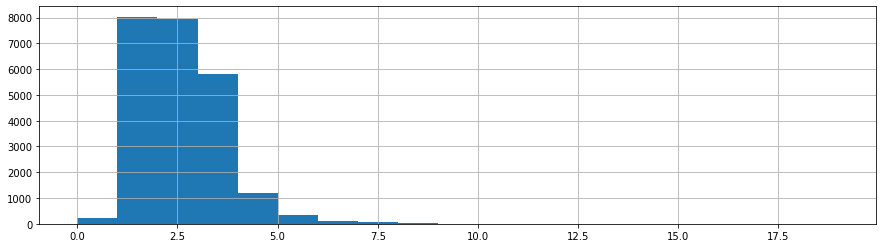

In [71]:
data['rooms'].hist(bins = 19, figsize = (15,4))

Снова убираем "хвост" из элитного жилья

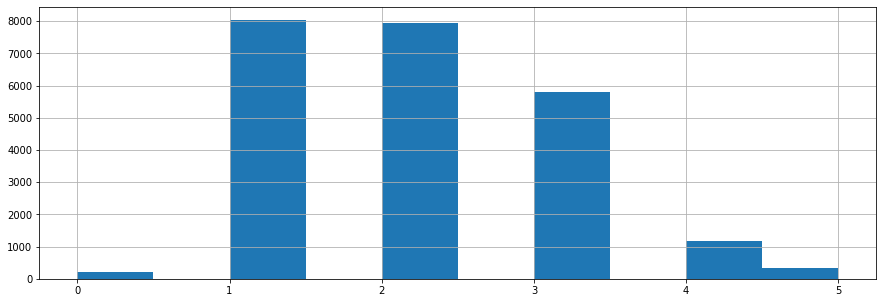

In [72]:
data.query('rooms <= 5')['rooms'].hist(figsize = (15,5))
plt.show()

**Вывод:**
1 и 2 - комнатные квартиры превуалируют в выборке, с небольшим отставанием 3-комнатные. На удивление мало квартир - студий, даже меньше чем 4 и 5 комнатных квартир. Вероятно, что пользователи сервиса часто проставляют им цифру 1, при этом не указывая, что это студия, т.к. подобные огрехи мы устраняли.

#### 4.1.6 Изучаем номер этажа

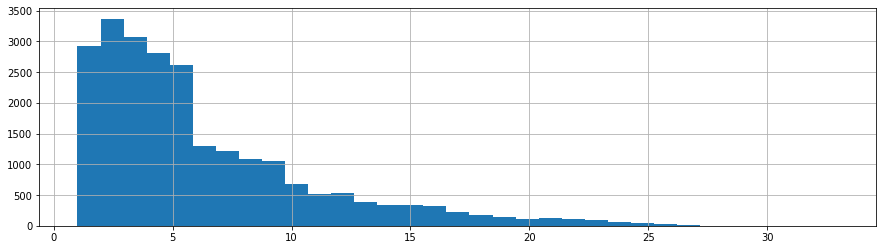

In [73]:
data['floor'].hist(bins = 33, figsize = (15,4))
plt.show()

**Вывод:**
В выборке слабо представлены квартиры на высоких этажах. 2 объяснения: либо старый жилой фонд из 5 и 9-этажек, либо так влияет ограничение на высокоэтажную застройку в центре. Скорее всего, во `floors_total` будет похожая картина.

#### 4.1.7 Изучаем тип этажа квартир

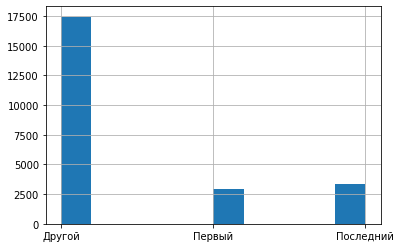

In [74]:
data['floor_type'].hist()
plt.show()

**Вывод:**
Меньше всего в продаже первых этажей, чуть больше последних этажей. Основная масса от 2го до предпоследнего.

#### 4.1.8 Изучаем общую этажность домов

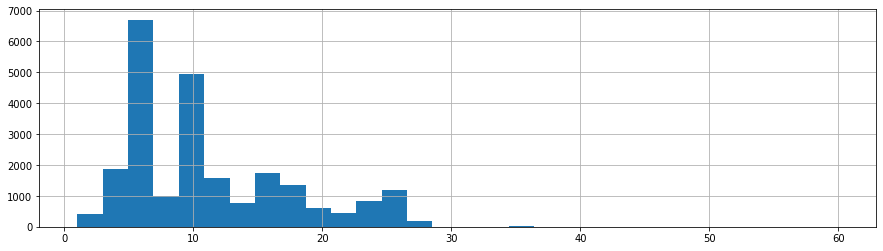

In [75]:
data['floors_total'].hist(bins = 30, figsize = (15,4))
plt.show()

Взглянем на срез от 1 до 30

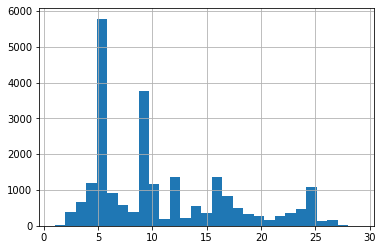

In [76]:
data.query('floors_total <= 30')['floors_total'].hist(bins = 29)
plt.show()

**Вывод**
Как и ожидалось, очень много 5 и 9 этажек.

#### 4.1.9 Изучаем распределение расстояний от центра

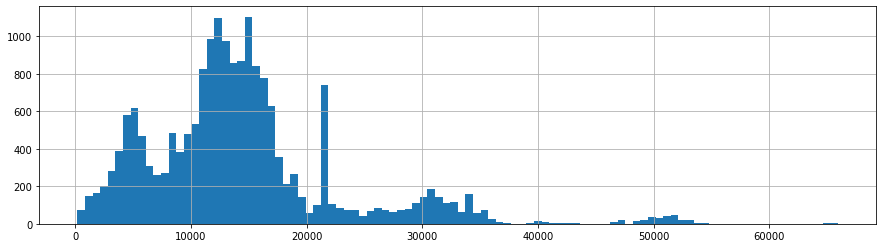

In [77]:
data['city_centers_nearest'].hist(bins = 100, figsize = (15,4))
plt.show()

**Вывод:**
Основная масса квартир расположена в черте города, на окраине больше, чем в центре. В пригородах квартир мало, в области еще меньше

#### 4.1.10 Изучаем распределение расстояний квартир от ближайшего аэропорта

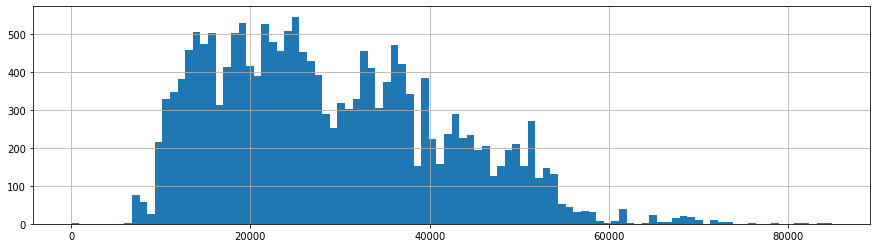

In [78]:
data['airports_nearest'].hist(bins = 100, figsize = (15,4))
plt.show()

**Вывод:**
Судя по всему, слишком близко к аэропорту квартиры не строят

#### 4.1.11 Изучаем распределение расстояний квартир от ближайшего парка

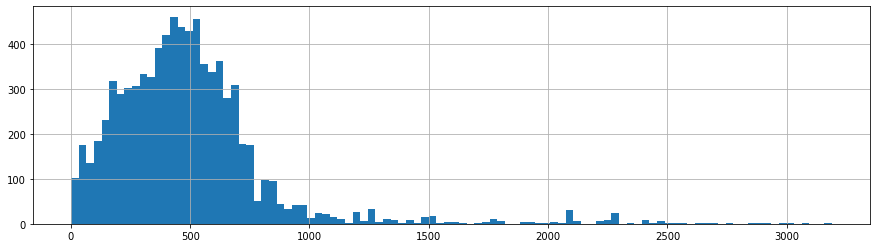

In [79]:
data['parks_nearest'].hist(bins = 100, figsize = (15,4))
plt.show()

И, наоборот, жилые кварталы расположены вблизи парков. Но нужно также принять во внимание, что в нашем датафрейме много пропусков в этих значениях

#### 4.1.12 Изучаем распределение дней и месяцев публикации

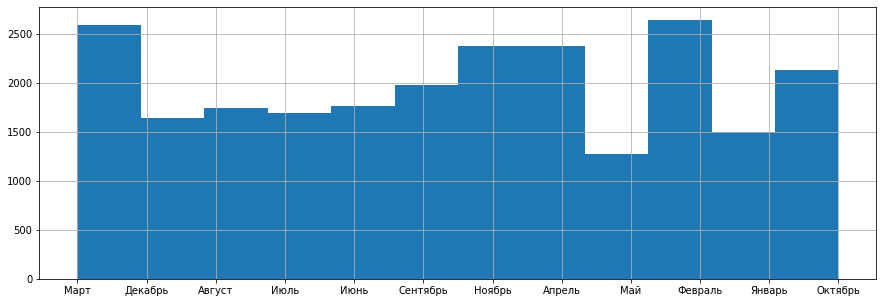

In [80]:
data['publication_month'].hist(bins=12, figsize = (15,5))
plt.show()

Мы уже изучали это выше. Больше всего объявлений публикуется с февраля по апрель и в ноябре. Меньше всего - в мае и январе.

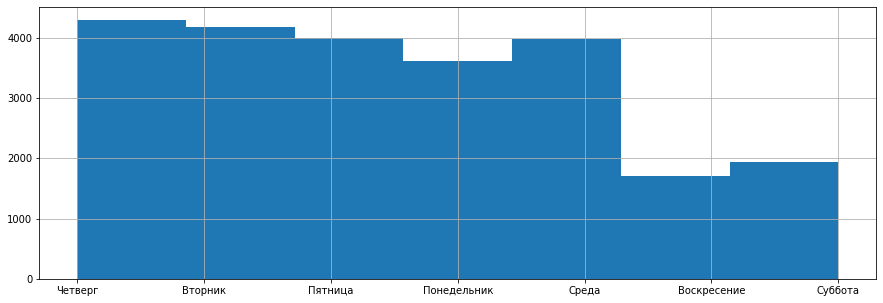

In [81]:
data['weekday'].hist(bins = 7, figsize = (15,5))
plt.show()

В сб и вс публикуется меньше всего объявлений. у риелторов выходные.

#### 4.2. Изучение срока экспозиции объявлений

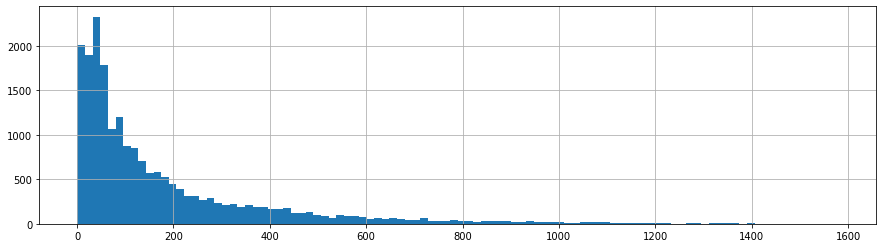

In [82]:
data['days_exposition'].hist(bins = 100, figsize = (15,4))
plt.show()

In [83]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение экспозиции объявления 181 день, половина объявлений закрывается за срок менее 95 дней. Уберем значения от 500 дней и посмотрим на срез

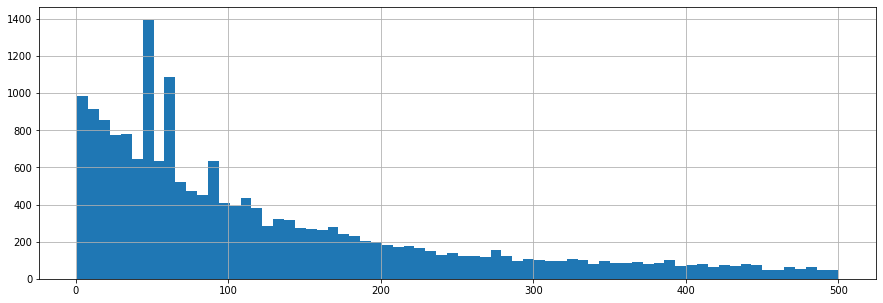

In [84]:
data.query('days_exposition <= 500')['days_exposition'].hist(bins=70, figsize=(15,5))
plt.show()

Видим 3 странных моды в районе 50 и 90 дней, посмотрим на срез от 20 до 100 дней

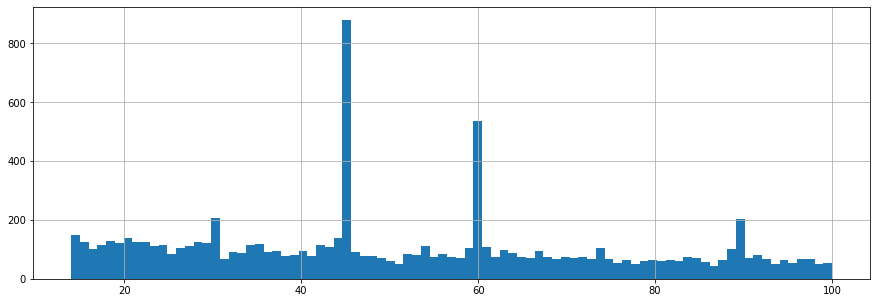

In [85]:
data.query('14 <= days_exposition <= 100')['days_exposition'].hist(bins=87, figsize=(15,5))
plt.show()

45 и 60 дней - самый "закрываемый" срок. Также есть небольшие пики на значениях 30 и 90. Все эти числа делятся на 15. Но нет пика на 75 день. Вероятно, что сервис в первые два месяца каждые 15 дней делает рассылку по продавцам, чтобы те актуализировали базу. Но тогда мы бы видели пик на 75 день, а его нет.

In [86]:
data.query('days_exposition > 44.9').sort_values('days_exposition').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,publication_month,publication_year,floor_type,distance_from_center_km
6652,8,4300000,50.0,2019-03-15,4,2.60,5.0,40.0,2,NaN,False,False,NaN,NaN,Санкт-Петербург,12734.0,13974.0,0.0,NaN,1.0,61.0,45.0,86000,Пятница,Март,2019,Другой,14.0
16219,14,450000,38.5,2018-07-11,2,2.65,2.0,21.8,1,NaN,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0,11688,Среда,Июль,2018,Первый,NaN
11385,14,4300000,58.0,2018-09-15,3,2.55,5.0,42.0,1,NaN,False,False,6.0,NaN,Санкт-Петербург,16349.0,16098.0,1.0,208.0,1.0,246.0,45.0,74137,Суббота,Сентябрь,2018,Первый,16.0
6026,19,3900000,64.0,2017-09-30,2,2.80,5.0,33.0,1,NaN,False,False,10.0,0.0,Санкт-Петербург,21851.0,25274.0,0.0,NaN,1.0,591.0,45.0,60937,Суббота,Сентябрь,2017,Первый,25.0
18493,4,3700000,32.0,2017-06-01,1,2.65,25.0,15.2,22,False,False,False,8.0,1.0,Санкт-Петербург,7711.0,13845.0,1.0,1326.0,0.0,NaN,45.0,115625,Четверг,Июнь,2017,Другой,14.0
18494,0,3000000,36.0,2018-01-04,1,NaN,5.0,20.3,2,NaN,False,False,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,45.0,83333,Четверг,Январь,2018,Другой,NaN
20302,9,2700000,42.6,2018-03-17,1,2.50,9.0,24.2,9,NaN,False,False,NaN,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0,63380,Суббота,Март,2018,Последний,NaN
16195,3,3000000,35.8,2018-01-20,1,3.00,4.0,20.2,2,NaN,False,False,NaN,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,83798,Суббота,Январь,2018,Другой,NaN
7078,7,1700000,40.0,2018-02-05,1,NaN,9.0,22.6,6,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,42500,Понедельник,Февраль,2018,Другой,NaN
22573,8,2250000,24.0,2017-09-28,0,NaN,12.0,15.0,3,NaN,True,True,NaN,2.0,поселок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,93750,Четверг,Сентябрь,2017,Другой,NaN


Никаких закономерностей не обнаружено. Вероятно, что наше предположение верно. Нужно уточнить у разработчиков.

Чтобы выяснить какие продажи являются быстрыми, а какие - необычно долгими, посмотрим на диаграмму размаха

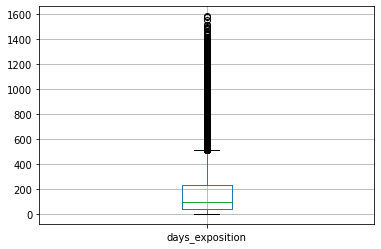

In [87]:
data.boxplot('days_exposition')
plt.show()

Видим много выбросов. Посчитаем значение 3го квартиля + 1,5 межквартильных размаха. Все продажи, что дольше - будет считать необычайно долгими

In [88]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [89]:
232 + 1.5 * (232 - 45)

512.5

Все продажи, что шли дольше 512 дней - необычно долгие.

Теперь займемся необычно быстрыми продажами. На boxplot выбросов внизу нет. Посчитаем значения ниже 2 недель.

In [90]:
data.query('days_exposition < 14')['days_exposition'].value_counts().sort_values()

1.0       1
2.0       3
12.0    108
6.0     124
10.0    127
13.0    128
11.0    135
8.0     139
9.0     143
5.0     152
3.0     158
4.0     176
7.0     234
Name: days_exposition, dtype: int64

1 и 2 дня сильно выбиваются из общей выборки. Будем считать эти значения необычайно быстрыми

**Вывод: 1-2 дня - необычно быстрые продажи, продажи дольше 512 дней - необычно долгие**

#### 4.3 Изучения влияния различных факторов на стоимость объекта

Изучим как на полную стоимость объекта влияют следующие факторы:
- total_area
- living_area
- kitchen_area
- rooms
- floor
- weekday
- publication_month
- publication_year

Для начала посмотрим корреляцию

In [91]:
data[
    [
        'last_price',
        'total_area', 
        'living_area', 
        'kitchen_area', 
        'rooms', 
        'floor', 
        'weekday', 
        'publication_month', 
        'publication_year'
    ]
].corr().loc['last_price'].to_frame()

C:\Users\Felixalex\AppData\Local\Temp\ipykernel_27640\3436065885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[


,last_price
last_price,1.000000
total_area,0.653741
living_area,0.585950
kitchen_area,0.520170
rooms,0.363261
floor,0.026760
publication_year,-0.043015


Сильнее всего цена квартиры связана с площадью (сильнее всего с общей, а зачем с жилой и площадью кухни), небольшая зависимость есть также от количества комнат. В таблице нет расчета по дням недели и месяцам, т.к. это строки.

Посмотрим на диаграммы рассеивания и медианные значения

#### 4.3.1 Изучаем зависимость цены от площади квартиры

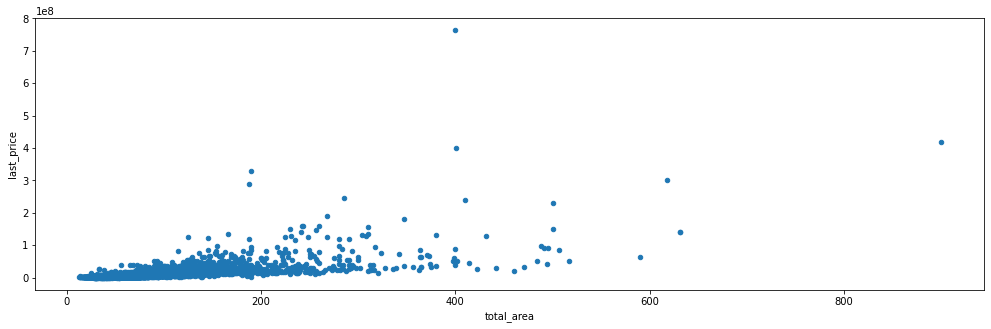

In [92]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', figsize = (17,5))
plt.show()

Выбросы портят график. Посмотрим срез ближе

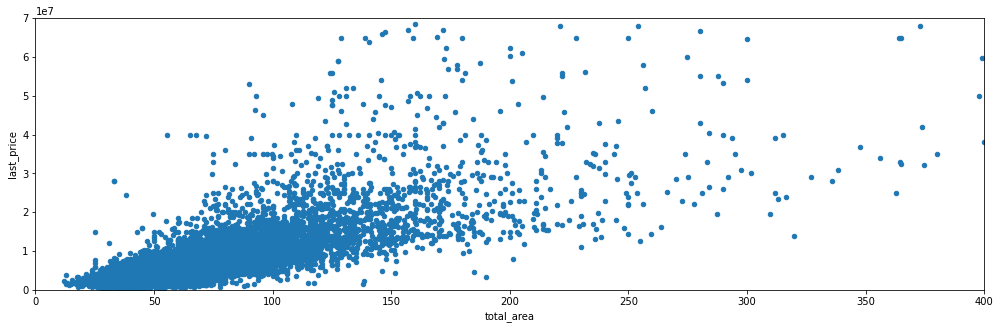

In [93]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', figsize = (17,5), xlim = (0,400), ylim = (0, 70000000))
plt.show()

**Вывод: корреляция очивидна, квартиры с большей площадью стоят дороже**

#### 4.3.2 Изучаем зависимость цены от жилой площади квартиры

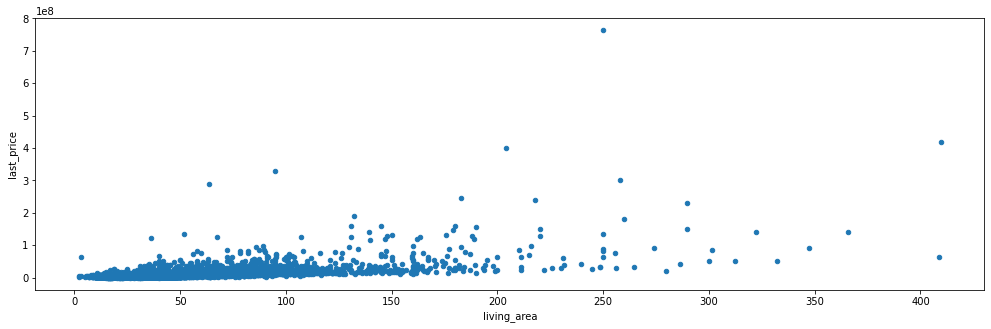

In [94]:
data.plot(x = 'living_area', y = 'last_price', kind = 'scatter', figsize = (17,5))
plt.show()

Посмотрим срез

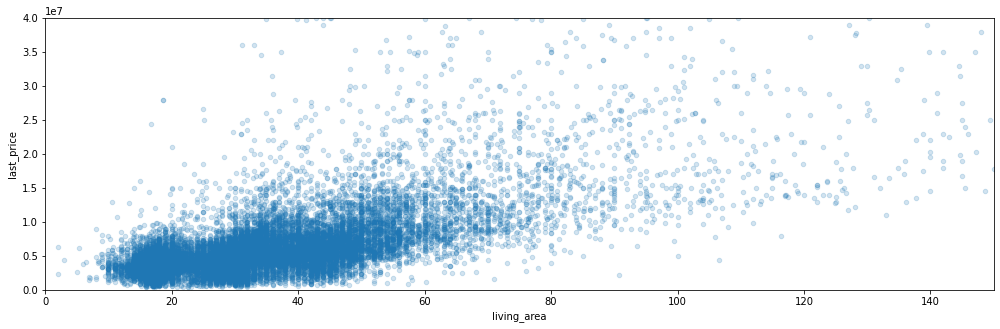

In [95]:
data.plot(x = 'living_area', y = 'last_price', kind = 'scatter', figsize = (17,5), xlim = (0,150), ylim = (0, 40000000), alpha = 0.2)
plt.show()

Тут данные выглядят интереснее, корреляция явно есть при значениях выше 50 кв.м. Попробуем укрупнить группы и посмотреть на медианы

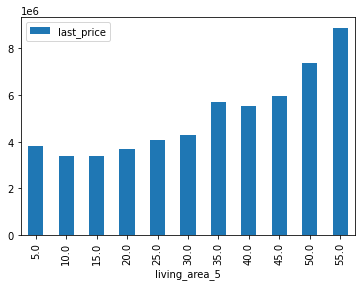

In [96]:
data['living_area_5'] = 5 * round(data['living_area'] / 5)

data.pivot_table(index = 'living_area_5', values = 'last_price', aggfunc = 'median') \
    .query('0 < living_area_5 < 60') \
    .plot(kind = 'bar')

plt.show()

Очень интересно. Похоже, что в квартирах с жилой площадью менее 30 метров цена не так сильно зависит от метража. Вероятно, тут влияет множество других факторов. Например, отделка, удаленность от центра и т.д.

**Вывод: Квартиры с большей жилой площадью стоят дороже, но на стоимость квартир с жилой площадью менее 35 кадратных метров не так сильно привязана к метражу**

Вернемся к шагу 4.3.2 и посмотрим, упустили ли мы этот момент там

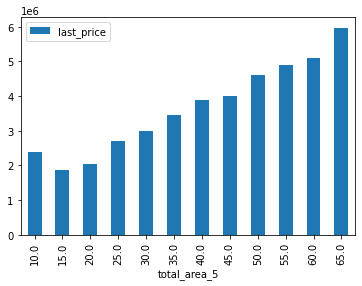

In [97]:
data['total_area_5'] = 5 * round(data['total_area'] / 5)

data.pivot_table(index = 'total_area_5', values = 'last_price', aggfunc = 'median') \
    .query('0 < total_area_5 < 70') \
    .plot(kind = 'bar')

plt.show()

Тут зависимость сохраняется. Несколько сглажена только на квартирах - студиях

#### 4.3.3 Изучаем зависимость цены от площади кухни

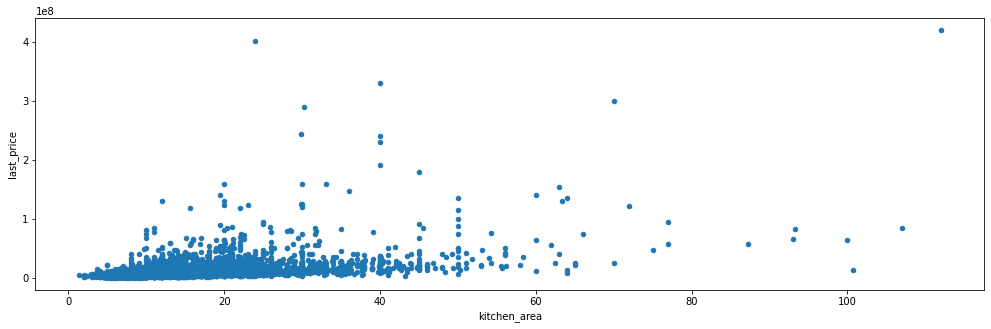

In [98]:
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter', figsize = (17,5))
plt.show()

Корреляция явно есть. Смотрим срез по низкой площади

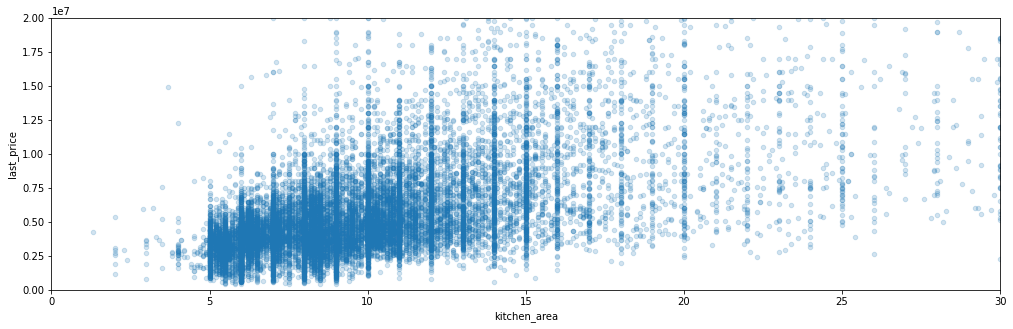

In [99]:
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter', figsize = (17,5), xlim = (0,30), ylim = (0, 20000000), alpha = 0.2)
plt.show()

Картина похожа на 2 предыдущих зависимости, укрупним группы и посмотрим медианы.

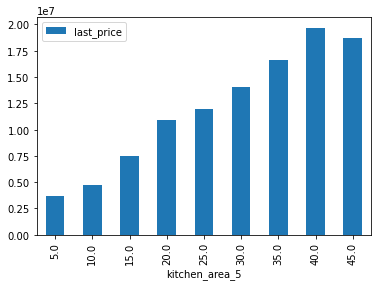

In [100]:
data['kitchen_area_5'] = 5 * round(data['kitchen_area'] / 5)

data.pivot_table(index = 'kitchen_area_5', values = 'last_price', aggfunc = 'median') \
    .query('0 < kitchen_area_5 < 50') \
    .plot(kind = 'bar')

plt.show()

Истории, похожей на жилую площадь не наблюдаем.

**Вывод: площадь кухни прямо влияет на цену квартиры**

#### 4.3.4 Изучаем зависимость цены от количества комнат

График будем строить по медианам, поэтому для начала посмотрим на количество значений

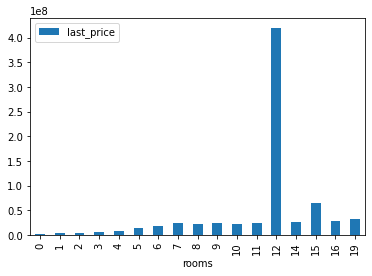

In [101]:
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')
plt.show()

На значении в 12 комнат явно есть выброс. Исключим их из выборки

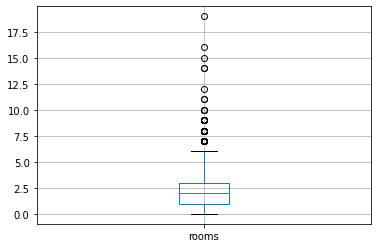

In [102]:
data.boxplot('rooms')
plt.show()

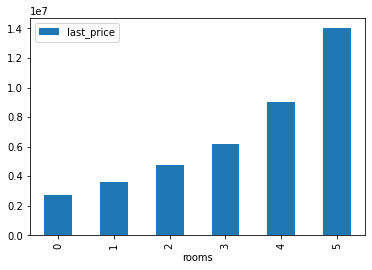

In [103]:
data.query('rooms < 6').pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')
plt.show()

**Вывод: Зависимость цены от числа комнат прямая.**

#### 4.3.5 Изучаем зависимость цены от типа этажа

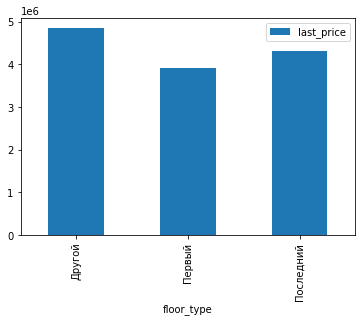

In [104]:
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')
plt.show()

**Вывод: Первые и последние этаж продаются с дисконтом, причем в случае первых этажей он выше**

#### 4.3.6 Изучаем зависимость цены от даты размещения (день недели, месяц, год)

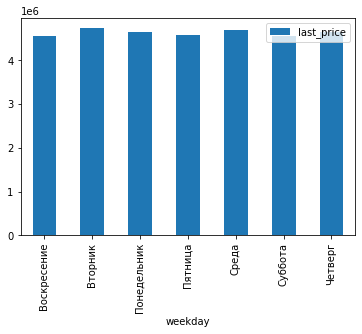

In [105]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')
plt.show()

Корреляции нет

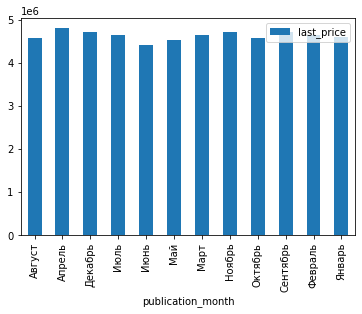

In [106]:
data.pivot_table(index = 'publication_month', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')
plt.show()

Тоже не видим особой корреляции. Разброс совсем небольшой

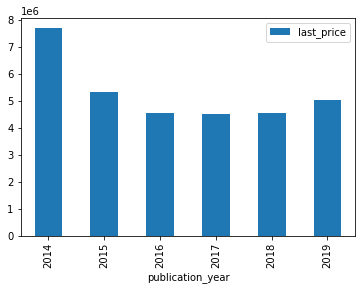

In [107]:
data.pivot_table(index = 'publication_year', values = 'last_price', aggfunc = 'median').plot(kind = 'bar')
plt.show()

Цены на недвижимость в период с 2014 по 2017 год несколько снизились

**Вывод: цены на недвижимость почти никак не зависят от дня недели и месяца публикации. В период с 2014 по 2017 год цены падали, что объясняется рецессией в экономике.**

Посмотрим на то, как менялась площадь продаваемых квартир по годам

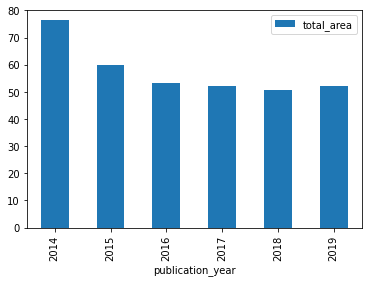

In [108]:
data.pivot_table(index = 'publication_year', values = 'total_area', aggfunc = 'median').plot(kind = 'bar')
plt.show()

С 2014 года медианная площадь продаваемых квартир также уменьшалась, а цена, как мы помним, сильно коррелирует с ней. Хорошо бы посмотреть как изменялась стоимость квадратного метра по годам. Но для начала посмотрим на корреляцию цены на квадратный метр с общей площадью

In [109]:
data['total_area'].corr(data['price_per_m2'])

0.30211086509528157

Зависомость есть, но слабая, посмотрим график

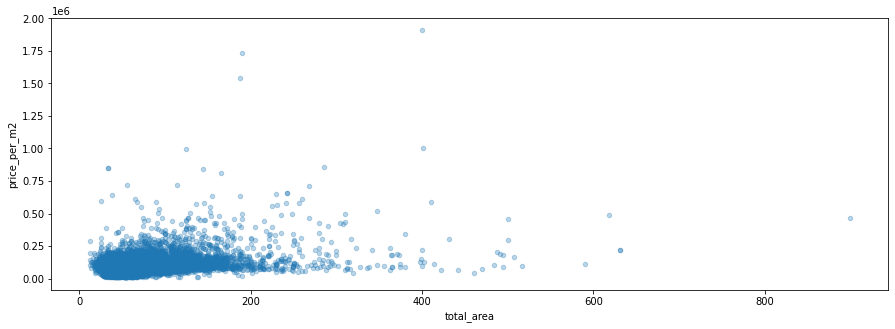

In [110]:
data.plot(x = 'total_area', y = 'price_per_m2', kind = 'scatter', figsize = (15,5), alpha = 0.3)
plt.show()

Посмотрим ближе

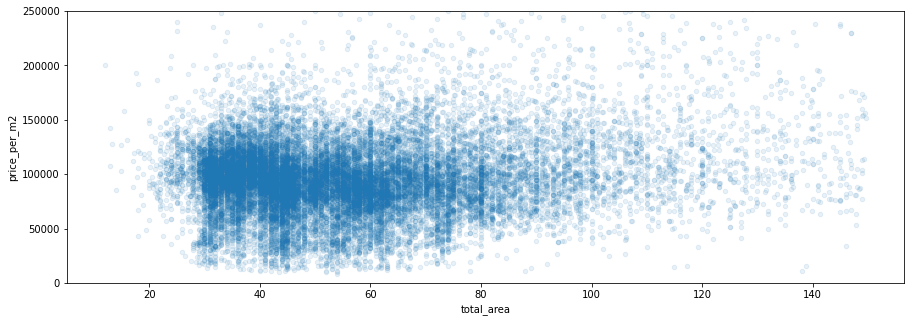

In [111]:
data.query('total_area < 150') \
    .plot(x = 'total_area', y = 'price_per_m2', kind = 'scatter', figsize = (15,5), ylim = (0, 250000), alpha = 0.1)
plt.show()

Практически линейная зависимость у квартир до 100 кв.м

Итак, от общей площади цена на квадратный метр почти не зависит. Значит, чтобы узнать, что вызвало падение цен на недвижимость в период с 2014 по 2017 год нужно посмотреть на изменение стоимости квадратного метра по годам. По первому предположению, это рецессия в экономике и если корреляция есть, то оно верно. Если же корреляции не будет, то это только уменьшение площади продаваемого жилья

In [112]:
data['price_per_m2_10000'] = (10000 * round(data['price_per_m2'] / 10000)).astype('int')

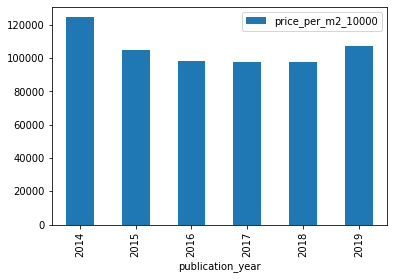

In [113]:
data.pivot_table(index = 'publication_year', values = 'price_per_m2_10000').plot(kind = 'bar')
plt.show()

**Вывод: цены на недвижимость почти никак не зависят от дня недели и месяца публикации. В период с 2014 по 2017 год цены падали, что объясняется уменьшением площади продаваемого жилья и рецессией в экономике, т.к. цены на квадратный метр также падали**

#### 4.4 Считаем среднюю цену квадратного метра по 10 населенным пунктам с наибольшим количеством объявлений

Составим сводную таблицу

In [114]:
largest_cities = data.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc = ['count','mean']) \
    .sort_values(('count','price_per_m2'), ascending = False) \
    .head(10)
largest_cities

,count,mean
,price_per_m2,price_per_m2
locality_name,,
Санкт-Петербург,15749,114843.936504
поселок Мурино,556,85681.685252
поселок Шушары,440,78677.525000
Всеволожск,398,68654.894472
Пушкин,369,103125.379404
Колпино,338,75423.905325
поселок Парголово,327,90176.813456
Гатчина,307,68745.641694


In [115]:
largest_cities.sort_values(('mean', 'price_per_m2'))

,count,mean
,price_per_m2,price_per_m2
locality_name,,
Выборг,237,58141.345992
Всеволожск,398,68654.894472
Гатчина,307,68745.641694
Колпино,338,75423.905325
поселок Шушары,440,78677.525000
поселок Мурино,556,85681.685252
поселок Парголово,327,90176.813456
деревня Кудрово,299,92471.528428


**Вывод: Санкт-Петербург по средним значениям самый "дорогой" город из получившейся выборки, Выборг - самый дешевый.**

#### 4.5 Определяем зависимость средней стоимости объекта от удаленности от центра в Санкт-Петербурге

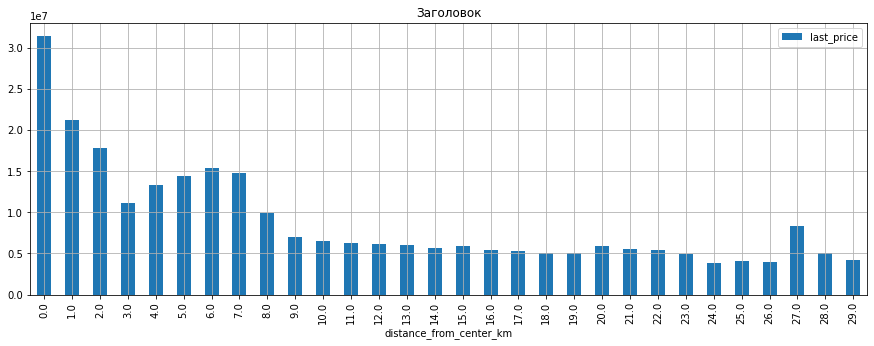

In [116]:
data.query('locality_name == "Санкт-Петербург"') \
    .pivot_table(index = 'distance_from_center_km', values = 'last_price') \
    .plot(kind = 'bar', figsize = (15,5), grid = True, title = 'Заголовок')
plt.show()

Ожидаемо, самое дорогое жилье находится в центре. Увеличение цен с 3 до 6 км может объясняться сосредоточением районов с элитным жильем на этих расстояниях. С 6 км наблюдаем плавное снижение средней стоимости объектов, а затем. Странным выглядит выброс на 27км. Вероятно, что на этом удалении также находится район с элитной недвижимостью, что дает нам выбросы.

**Вывод: самые дорогие объекты находятся в центре города (средняя цена более 20 млн. рублей), по мере удаления от центра стоимость снижается, но также есть сосредоточение дорогой недвижимости в районе 4-7 и 27 км от центра**

### Общий вывод

- Цены на недвижимость <u>сильнее всего </u> коррелируют с площадью квартиры, жилой площадью и площадью кухни. Исключение составляют квартиры с жилой площадью до 35 кв.м. там цена зависит от других факторов
- Комнатность сильно влияет на цену. Зависимость прямая
- Ценники на первые и последние этажи ниже чем на остальные. Приблизительно на 20% и 10% соответственно.
- Месяц и день недели почти не влияют на стоимость квартиры
- Цены на квартиры могут меняться год к году
- самые дорогие объекты находятся в центре города (средняя цена более 20 млн. рублей), по мере удаления от центра стоимость снижается, но также есть сосредоточение дорогой недвижимости в районе 4-7 и 27 км от центра**